In [31]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Michael/projects/general/titanic/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data['Sex_num'] = data.Sex.map({'male':0,'female':1})
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked_num'] = data.Embarked.map({'S':0,'C':1,'Q':2})
data['Embarked_num'].fillna(data['Embarked_num'].mean(),inplace=True)
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Sex_num           0
Embarked_num      0
dtype: int64

In [22]:
X = data[['Pclass','Sex_num','Age','Embarked_num']]
y = data['Survived']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [46]:
feature_cols = data[['Pclass','Sex_num','Age','Embarked_num']]
for col in zip(feature_cols, logreg.coef_[0]):
    print col[0],col[1]
logreg.intercept_

Pclass -1.10562491695
Sex_num 2.46078447843
Age -0.0335187139099
Embarked_num 0.334478058351


array([ 1.84033529])

In [32]:
for col in zip(feature_cols, logreg.coef_[0]):
    print 'A unit increase in', col[0], 'equals a', exp(col[1]), 'increase in odds.'

A unit increase in Pclass equals a 0.331003967607 increase in odds.
A unit increase in Sex_num equals a 11.7139973147 increase in odds.
A unit increase in Age equals a 0.967036814022 increase in odds.
A unit increase in Embarked_num equals a 1.39721093229 increase in odds.


In [77]:
y_prob = logreg.predict_proba(X_train)[1,:]
print y_prob

[ 0.85852097  0.14147903]


In [45]:
print X_train.head(1)

    Pclass  Sex_num  Age  Embarked_num
35       1        0   42             0


In [48]:
print 1.84 + .33*exp(-1.1) + 42 * exp(-.03)

42.7085598667


In [51]:
print 1.84 + .33*exp(-1.1) + 52 * exp(-.03)

52.4130152021


In [52]:
print 1.84 + 11.7*1 + .33*exp(-1.1) + 52 * exp(-.03)

64.1130152021


In [83]:
y_pred = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.784753363229


In [54]:
print y_test.mean()
print 1 - y_test.mean()

0.42600896861
0.57399103139


In [55]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
print con_mat

[[111  17]
 [ 31  64]]


In [56]:
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]

In [57]:
sensitivity = float(true_pos)/(false_neg + true_pos)
print sensitivity
print metrics.recall_score(y_test, y_pred)

0.673684210526
0.673684210526


In [58]:
specificity = float(true_neg) / (true_neg + false_pos)
print specificity

0.8671875


In [86]:
probs = logreg.predict_proba(X_test)[:, 1]

In [69]:
preds_02 = np.where(probs >= 0.2, 1, 0)

In [72]:
con_mat_02 = metrics.confusion_matrix(y_test, preds_02)
print con_mat_02

[[75 53]
 [15 80]]


In [73]:
true_neg = con_mat_02[0][0]
false_neg = con_mat_02[1][0]
true_pos = con_mat_02[1][1]
false_pos = con_mat_02[0][1]

In [74]:
sensitivity = float(true_pos)/(false_neg + true_pos)
print sensitivity

0.842105263158


In [75]:
specificity = float(true_neg) / (true_neg + false_pos)
print specificity

0.5859375


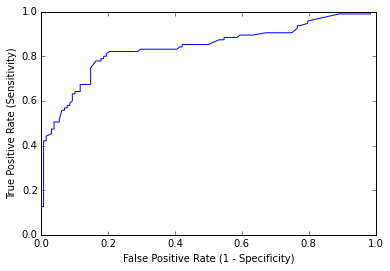

In [88]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [90]:
print metrics.roc_auc_score(y_test, probs)

0.837952302632


In [91]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.84912945986475408

In [92]:
X = data[['Pclass','Sex_num','Age','Embarked_num']]

In [93]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.84912945986475408